In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FixedLocator

### Data Loading and Merging
This step integrates multiple datasets to link building characteristics with their corresponding damage outcomes. The successful merge creates a comprehensive dataset of over 700,000 records, providing the scale necessary to identify meaningful patterns in structural vulnerability.


In [2]:
structure_df = pd.read_csv("data/csv_building_structure.csv")

damage_assessment_df = pd.read_csv("data/csv_building_damage_assessment.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_12388\1362159765.py:3: DtypeWarning: Columns (5,17,29,34,35,36,37,38,39,40,41,42,43,47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  damage_assessment_df = pd.read_csv("data/csv_building_damage_assessment.csv")


In [3]:
merged_df = pd.merge(structure_df, damage_assessment_df, on="building_id")

merged_df.head(10)

,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,120101000061,12,1207,120703,1,1,18,216,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
6,120101000071,12,1207,120703,1,0,13,234,9,0,...,NaN,NaN,0.0,0,0,0,0,0,0,0
7,120101000081,12,1207,120703,1,1,8,280,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
8,120101000091,12,1207,120703,1,1,22,268,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0
9,120101000101,12,1207,120703,1,1,10,268,9,9,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Columns: 109 entries, building_id to has_geotechnical_risk_other
dtypes: float64(17), int64(31), object(61)
memory usage: 633.8+ MB


### Checking for Missing Values
This cell checks for missing values across all columns to ensure data completeness. The results confirm if any cleaning or imputation is required before proceeding with the analysis of structural and geographic features.

In [5]:
merged_df.isnull().sum()

building_id                           0
district_id_x                         0
vdcmun_id_x                           0
ward_id_x                             0
count_floors_pre_eq                   0
                                     ..
has_geotechnical_risk_liquefaction    0
has_geotechnical_risk_landslide       0
has_geotechnical_risk_rock_fall       0
has_geotechnical_risk_flood           0
has_geotechnical_risk_other           0
Length: 109, dtype: int64

### Checking for Duplicate Records
This step checks whether there are duplicate rows in the merged dataset.
Identifying duplicates is important to ensure that each building record is counted only once during analysis.

In [6]:
merged_df.duplicated().sum()

np.int64(0)

In [7]:
merged_df.columns.tolist()

['building_id',
 'district_id_x',
 'vdcmun_id_x',
 'ward_id_x',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'condition_post_eq',
 'damage_grade_x',
 'technical_solution_proposed_x',
 'district_id_y',
 'vdcmun_id_y',
 'ward_id_y',
 'damage_overall_collapse',
 'damage_overall_leaning',
 'damage_overall_adjacent_building_risk',
 'damage_foundation_severe',
 'damage_foundat

### Overall Damage Grade Distribution
This table presents the frequency of each damage grade in the dataset.
It provides an overview of how building damage is distributed across different severity levels.

In [8]:
damage_counts = merged_df['damage_grade_x'].value_counts()
damage_df = damage_counts.to_frame()
damage_df.columns = ['Count']

damage_df.head()

,Count
damage_grade_x,
Grade 5,275766
Grade 4,183844
Grade 3,136412
Grade 2,87257
Grade 1,78815


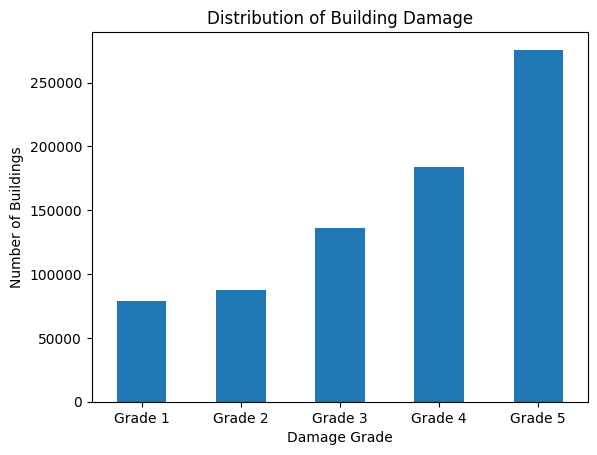

In [ ]:
#plot for damage grade
grade_order = ["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"]

damage_counts = merged_df["damage_grade_x"].value_counts().reindex(grade_order)
damage_counts.plot(kind="bar")
plt.xlabel("Damage Grade")
plt.ylabel("Number of Buildings")
plt.title("Distribution of Building Damage")
plt.xticks(rotation=0)
plt.show()

The distribution shows that more than half of the buildings suffered severe damage (Grade 4 or 5), highlighting the extreme intensity of the earthquake and the high vulnerability of the surveyed structures.

### Creation of Primary Building Material Feature
The dataset contains multiple binary columns representing different superstructure materials.
To simplify the analysis, these columns were combined into a single categorical feature that identifies the primary building material for each structure.


In [10]:
structure_cols = [
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber', 'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
    'has_superstructure_other'
]

merged_df["primary_material"] = merged_df[structure_cols].idxmax(axis=1)

merged_df["primary_material"] = merged_df["primary_material"].str.replace("has_superstructure_", "")

### idmax(axis=1)

In a One-Hot Encoded dataset—where columns contain 1s and 0s—this effectively finds 
 the "1" and returns the corresponding material name.

In [11]:
merged_df.columns

Index(['building_id', 'district_id_x', 'vdcmun_id_x', 'ward_id_x',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       ...
       'has_damage_cladding_glazing', 'has_geotechnical_risk',
       'has_geotechnical_risk_land_settlement',
       'has_geotechnical_risk_fault_crack',
       'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_landslide',
       'has_geotechnical_risk_rock_fall', 'has_geotechnical_risk_flood',
       'has_geotechnical_risk_other', 'primary_material'],
      dtype='object', length=110)

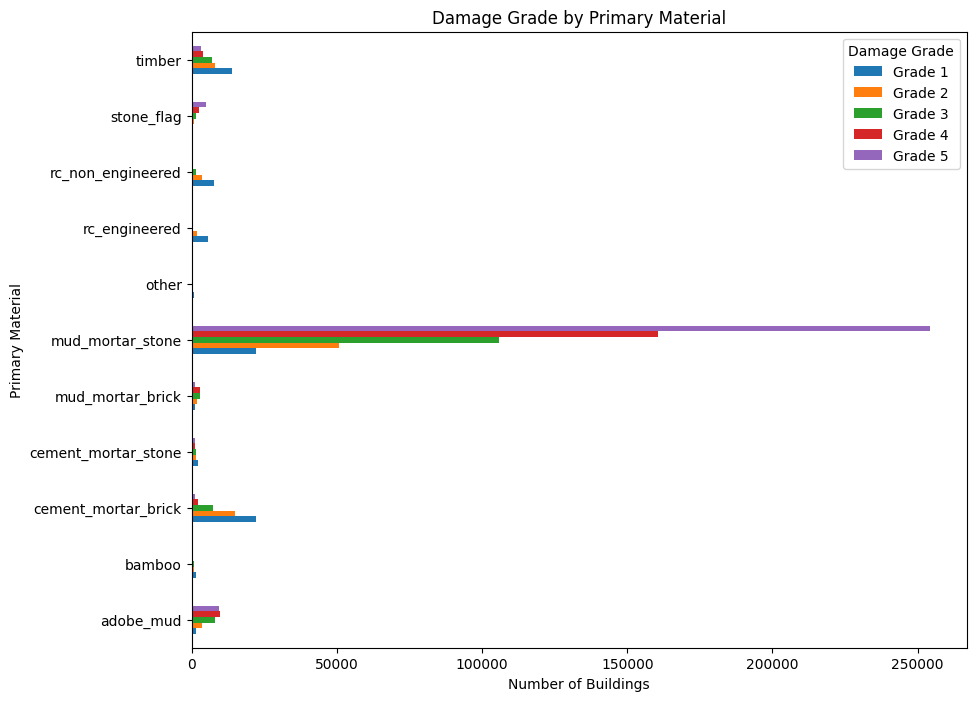

In [12]:
material_damage = (
    merged_df.groupby(["primary_material", "damage_grade_x"])
    .size()
    .unstack(fill_value=0)
)

material_damage = material_damage.reindex(columns=grade_order)

material_damage.plot(kind='barh', figsize=(10, 8))

plt.title("Damage Grade by Primary Material")
plt.xlabel("Number of Buildings")
plt.ylabel("Primary Material")
plt.legend(title="Damage Grade")

plt.show()

This plot shows that buildings constructed with mud mortar stone are the most prevalent in the dataset and show the highest vulnerability, accounting for the vast majority of Grade 5 (total destruction) cases due to their lower seismic resistance.

### Analysis of Mud Mortar Stone Buildings
Mud mortar stone buildings account for the largest portion of structures in the dataset and exhibit the highest damage frequencies.
Due to their prominence and observed vulnerability, a separate analysis was conducted to examine the damage grade distribution for this building material in more detail.


In [13]:
mud_mortar_df = merged_df[merged_df["primary_material"] == "mud_mortar_stone"]
mud_mortar_df.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other,primary_material
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0.0,0.0,0,0,0,0,0,0,0,mud_mortar_stone


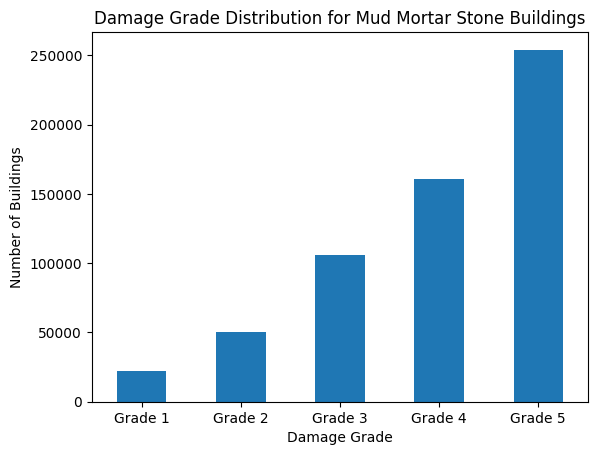

In [16]:
mmstone_df = merged_df[merged_df["primary_material"] == "mud_mortar_stone"]

mmstone_damage_counts = (
    mmstone_df["damage_grade_x"]
    .value_counts()
    .reindex(grade_order)
)

mmstone_damage_counts.plot(kind="bar")
plt.xlabel("Damage Grade")
plt.ylabel("Number of Buildings")
plt.title("Damage Grade Distribution for Mud Mortar Stone Buildings")
plt.xticks(rotation=0)
plt.show()

The distribution for mud mortar stone buildings is heavily skewed toward Grade 5, confirming that this traditional construction material was the primary contributor to the high volume of total structural collapses observed in the earthquake.

### Damage Grade Distribution by District (Top 10 Districts)
This analysis examines the distribution of damage grades across the ten districts with the highest number of recorded buildings.
Focusing on the most represented districts allows for clearer comparison of damage severity across different locations.


In [17]:
# this filters the dataset so we can focus on 10 districts that have the most buildings
top_districts = merged_df["district_id_x"].value_counts().index[:10]
location_df = merged_df[merged_df["district_id_x"].isin(top_districts)]

In [18]:
# getting the top 10 districts
top_districts = merged_df["district_id_x"].value_counts().head(10).index

# filtering the main dataframe
location_df = merged_df[merged_df["district_id_x"].isin(top_districts)]

# create the crosstab
# This shows districts as rows and Damage Grades as columns
district_summary = pd.crosstab(
    location_df["district_id_x"], 
    location_df["damage_grade_x"]
).reindex(columns=["Grade 1", "Grade 2", "Grade 3", "Grade 4", "Grade 5"])

district_summary

damage_grade_x,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
district_id_x,,,,,
12,7961,8605,9220,7946,5620
20,13087,14469,17085,15917,8191
21,2116,7151,16945,20910,11490
22,1353,2993,6520,14409,35364
23,1233,2009,3271,10796,71432
24,8330,11726,25130,28974,23859
28,2615,2745,8209,23284,40295
30,4952,7526,15218,26080,35346
31,32540,21135,18525,10928,7866


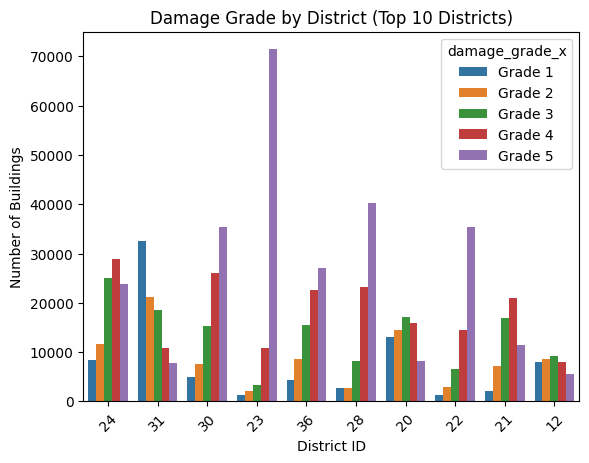

In [20]:
sns.countplot(
    x="district_id_x",
    hue="damage_grade_x",
    data=location_df,
    order=top_districts,
    hue_order = grade_order
)

plt.title("Damage Grade by District (Top 10 Districts)")
plt.xlabel("District ID")
plt.ylabel("Number of Buildings")
plt.xticks(rotation=45)
plt.show()

The geographic analysis reveals that damage was not uniform across the region, with District 23 suffering the highest volume of total destruction (Grade 5), followed by significant impacts in Districts 28, 22, and 30.

### Building Age and Damage Grade
This analysis explores the relationship between building age and earthquake damage severity.
By comparing the distribution of building ages across different damage grades, potential patterns in structural vulnerability can be observed.


In [21]:
merged_df["age_building"].describe().round(2)

count    762106.00
mean         24.33
std          65.04
min           0.00
25%           9.00
50%          16.00
75%          27.00
max         999.00
Name: age_building, dtype: float64

In [22]:
merged_df["age_building"].value_counts().head()

age_building
15    49983
20    46525
10    39794
25    37063
12    36458
Name: count, dtype: int64

<Figure size 800x500 with 0 Axes>

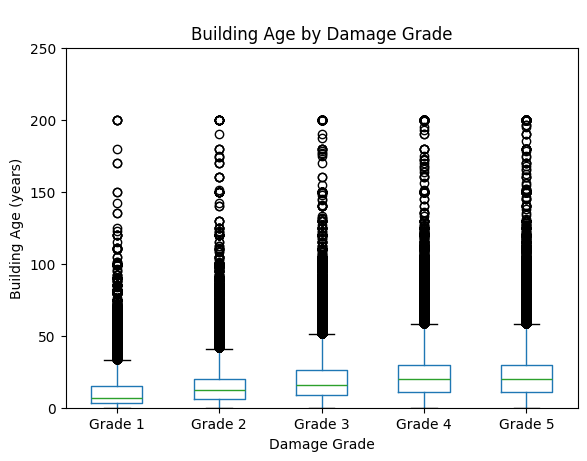

In [23]:
plt.figure(figsize=(8, 5))
merged_df.boxplot(
    column="age_building",
    by="damage_grade_x",
    grid=False
)

plt.ylim(0, 250)
plt.title("Building Age by Damage Grade")
plt.suptitle(" ")  # i added this coz it instantly creates an automatic title
plt.xlabel("Damage Grade")
plt.ylabel("Building Age (years)")
plt.show()

The box plot analysis reveals that older structures generally sustained more severe damage, with the median age of buildings in Grade 5 being noticeably higher than those in Grade 1, indicating that construction age is a significant risk factor for seismic vulnerability.

### Average Building Age by Damage Grade
This summary presents the average age of buildings for each damage grade.
It provides a simplified view of how building age varies with damage severity, complementing the distribution-based analysis.


In [24]:
avg_age_damage = merged_df.groupby("damage_grade_x")["age_building"].mean().round(2)
avg_age_damage.to_frame(name="Average Age")

,Average Age
damage_grade_x,
Grade 1,14.96
Grade 2,19.52
Grade 3,24.83
Grade 4,26.99
Grade 5,26.50


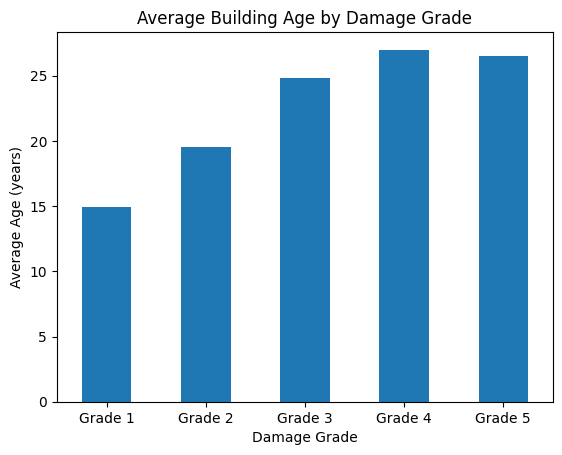

In [ ]:
avg_age_damage.plot(kind="bar")
plt.title("Average Building Age by Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("Average Age (years)")
plt.xticks(rotation=0)
plt.show()

This table summarizes the average age of buildings for each damage grade.
An increasing trend in average building age can be observed from Grade 1 to Grade 4, indicating that older buildings tend to experience more severe earthquake damage, while Grade 5 shows a similar average age to Grade 4.

In [26]:
merged_df["count_floors_pre_eq"].describe().round(2)

count    762106.00
mean          2.09
std           0.66
min           1.00
25%           2.00
50%           2.00
75%           2.00
max           9.00
Name: count_floors_pre_eq, dtype: float64

### Number of Buildings by Floor Count
This analysis shows the distribution of buildings based on the number of floors before the earthquake.
Understanding floor count distribution helps provide context for later analysis of how building height relates to damage severity.


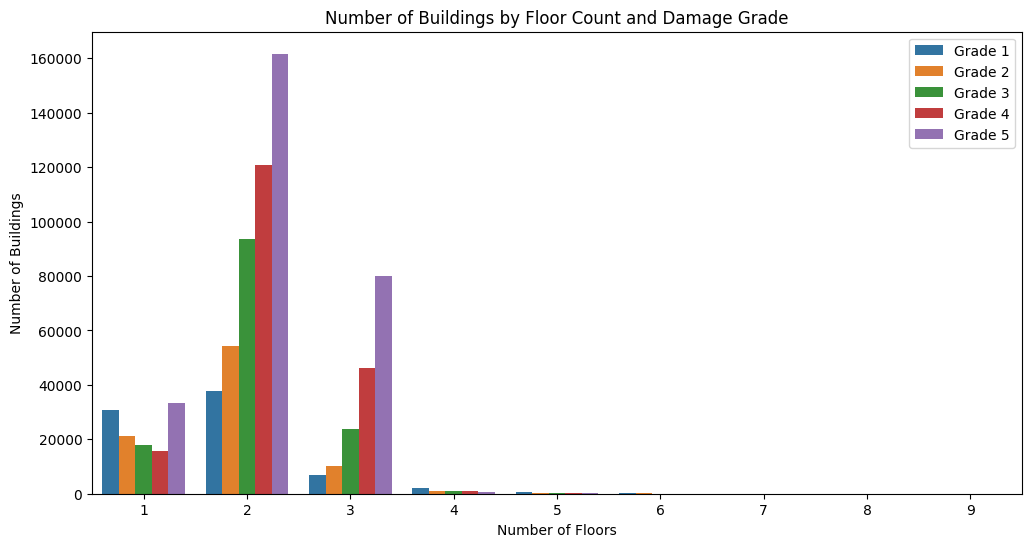

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=merged_df,
    x="count_floors_pre_eq",
    hue="damage_grade_x",
    hue_order=grade_order
)

plt.title("Number of Buildings by Floor Count and Damage Grade")
plt.xlabel("Number of Floors")
plt.ylabel("Number of Buildings")
plt.legend()
plt.show()

In [28]:
avg_floors = merged_df.groupby("damage_grade_x")["count_floors_pre_eq"].mean().round(2)
avg_floors.to_frame(name="Average Floors")

,Average Floors
damage_grade_x,
Grade 1,1.80
Grade 2,1.92
Grade 3,2.06
Grade 4,2.18
Grade 5,2.18


The analysis indicates that while 2-story buildings are the most common structure type, they also suffered the highest frequency of total destruction (Grade 5), suggesting that increased height combined with traditional building materials significantly amplified structural risk during the earthquake.